# **Melanoma Cancer Detection**

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

###### Download & Extract Dataset from One-Drive

In [2]:
import requests
import zipfile
import os

URL = 'https://powergrid1989-my.sharepoint.com/:u:/g/personal/60003871_powergrid_in/EWCIDBpGI4pDnXX-s5vjfXkB1dLKTOTq2B9_TvrCrGIMQQ?e=FNwhN8&download=1'

def download_and_extract_zip(url, destination_folder):
    """Downloads a zip file from a URL and extracts its contents to the specified destination folder."""
    zip_file_path = "temp.zip"

    try:
        # Send an HTTP GET request to the OneDrive link to download the file
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        response.raise_for_status()

        # Save the zip file to a temporary location

        with open(zip_file_path, "wb") as f:
            f.write(response.content)

        # Create the destination folder if it doesn't exist
        os.makedirs(destination_folder, exist_ok=True)

        # Extract the contents of the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(destination_folder)

        print(f"Zip file downloaded and extracted to: {destination_folder}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

    finally:
        # Remove the temporary zip file
        if os.path.exists(zip_file_path):
            os.remove(zip_file_path)


# Call the function to download and extract the data
if __name__ == "__main__":
    destination_folder = os.getcwd()
    download_and_extract_zip(URL, destination_folder)

Zip file downloaded and extracted to: /content


In [ ]:
url = 'https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing'

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(os.path.join(os.getcwd(),'DS_Skin-Cancer_CNN/Train'))
data_dir_test = pathlib.Path(os.path.join(os.getcwd(),'DS_Skin-Cancer_CNN/Test'))

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train Image Count :" , image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test Image Count :" , image_count_test)

Train Image Count : 2239
Test Image Count : 118


### Load using keras.preprocessing


In [5]:
train = keras.preprocessing.image_dataset_from_directory(data_dir_train)
test = keras.preprocessing.image_dataset_from_directory(data_dir_test)

Found 2239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds , val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, labels ='inferred', color_mode ='rgb',
                                                            batch_size = batch_size, image_size = (img_height, img_width),
                                                            seed=123, validation_split = 0.2, subset = 'both')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

(32, 180, 180, 3)
32
(32, 180, 180, 3)
32
(32, 180, 180, 3)
32


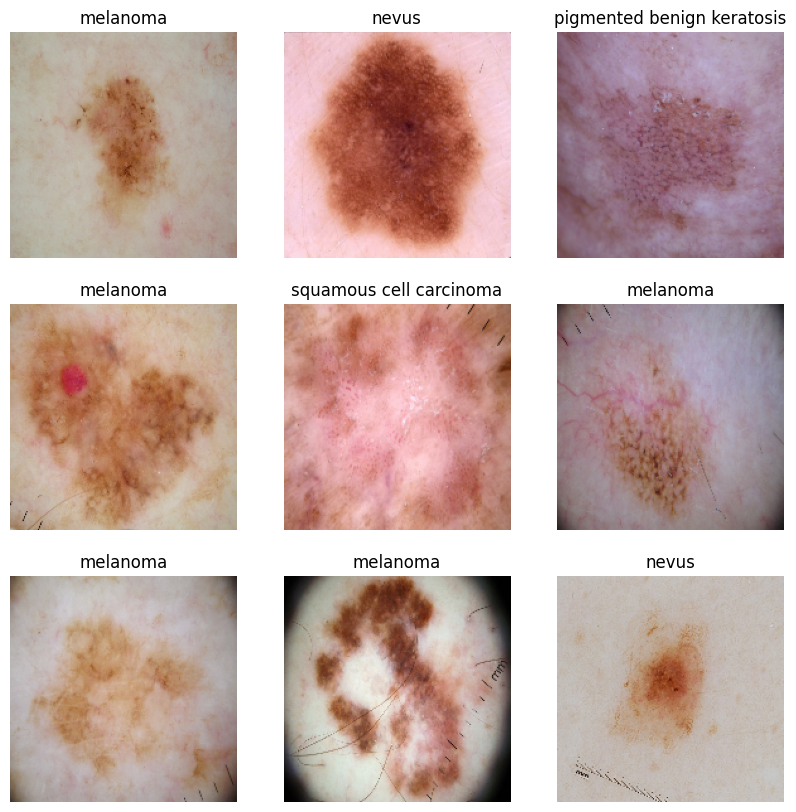

In [ ]:
# Visualtizing Training Data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(3):    # Take First Batch for visualisation
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))     # images object is converted to numpy array with relevant encoding type for display
    plt.title(class_names[labels[i]])
    plt.axis('off')
  print(images.shape)
  print(len(images))


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model-1 : Basic Sequential NN Model
 Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
from tensorflow.keras.layers import Rescaling

### Your code goes here

num_class = 9

model = Sequential(name='Sequential_Model')

model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3), name='Rescaling_Layer'))

# Or we can specify using below commands separately
#model.add(layers.Input(shape=(img_height,img_width,3)))
#model.add(layers.Rescaling(scale=1./255))

model.add(layers.Conv2D(filters= 16, kernel_size=3, padding='same', activation='relu', name='Conv2D_1_Layer'))
model.add(layers.MaxPooling2D(name='MaxPooling_1_Layer'))

model.add(layers.Conv2D(filters= 32, kernel_size=3, padding='same', activation='relu', name='Conv2D_2_Layer'))
model.add(layers.MaxPooling2D(name='MaxPooling_2_Layer'))

model.add(layers.Conv2D(filters= 64, kernel_size=3, padding='same', activation='relu', name='Conv2D_3_Layer'))
model.add(layers.MaxPooling2D(name='MaxPooling_3_Layer'))

model.add(layers.Flatten(name='Flatten_Layer'))
model.add(layers.Dense(units=128, activation='relu', name='Dense-1_Layer'))
model.add(layers.Dense(units=9, name='Dense-2_Layer'))


model.summary()

Model: "Sequential_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rescaling_Layer (Rescaling  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 Conv2D_1_Layer (Conv2D)     (None, 180, 180, 16)      448       
                                                                 
 MaxPooling_1_Layer (MaxPoo  (None, 90, 90, 16)        0         
 ling2D)                                                         
                                                                 
 Conv2D_2_Layer (Conv2D)     (None, 90, 90, 32)        4640      
                                                                 
 MaxPooling_2_Layer (MaxPoo  (None, 45, 45, 32)        0         
 ling2D)                                                         
                                                  

#### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
opt = keras.optimizers.Adam(learning_rate=0.001)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = opt,
              loss = loss_fn,
              metrics = ['accuracy'])

#### Train the model

In [ ]:
epochs = 20
model_fitted = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 19s 79ms/step - loss: 2.0147 - accuracy: 0.2305 - val_loss: 1.8153 - val_accuracy: 0.3893
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.7196 - accuracy: 0.3750 - val_loss: 1.6168 - val_accuracy: 0.4094
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4528 - accuracy: 0.4983 - val_loss: 1.3985 - val_accuracy: 0.5548
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4197 - accuracy: 0.5067 - val_loss: 1.3832 - val_accuracy: 0.5481
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2494 - accuracy: 0.5692 - val_loss: 1.3678 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1492 - accuracy: 0.5910 - val_loss: 1.3679 - val_accuracy: 0.5705
Epoch 7/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1006 - accuracy: 0.5988 - val_loss: 1.4177 - val_accuracy: 0.5168
Epoch 8/20
5

#### Visualizing training results

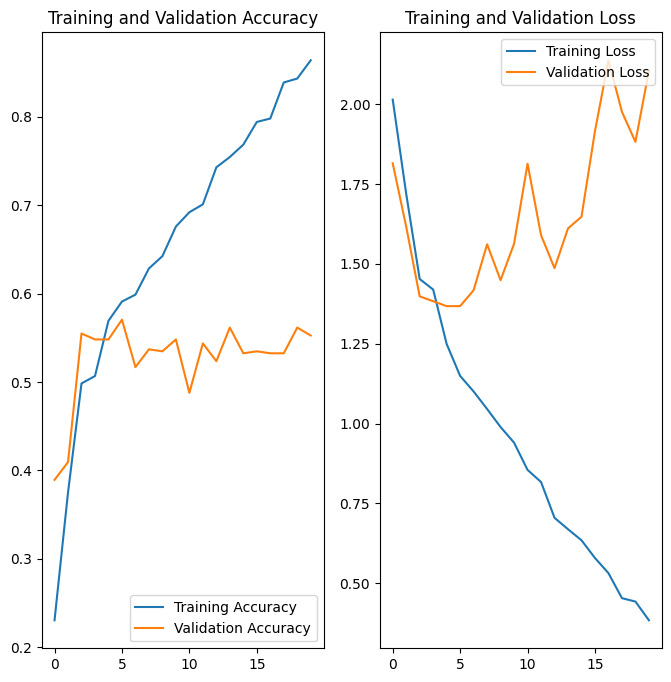

In [ ]:
acc = model_fitted.history['accuracy']
val_acc = model_fitted.history['val_accuracy']

loss = model_fitted.history['loss']
val_loss = model_fitted.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings :
- The training accuracy shows a steady increase, reaching above 0.85 by the end of 20 epochs. However, the validation accuracy initially increases but then fluctuates without any upward trend, stabilizing around 0.55.

- The training loss shows a steady decline, reaching a low value by the end of 20 epochs. However, the Validation Loss initially decreases but then begins to increase towards the end of 20 epochs.

- A significant gap between training and validation accuracy and a rising validation loss while the training loss continues to decrease, signifies ***MODEL OVERFITTING.***


# Model 2 : Sequential NN Model with implementation of Data Augmentation without Dropout.


In [10]:

aug_model = Sequential(name='CNN-Model-with-Random_Image_Augmentation')

aug_model.add(layers.Rescaling(1./255, input_shape = (img_height, img_width, 3), name='Rescaling_Layer'))

# Using Data Augmentation Layers eg. RandomCrop, Flip, Translate, Rotate etc.
aug_model.add(layers.RandomCrop(img_height, img_width, name='RandomCrop_Layer'))
aug_model.add(layers.RandomFlip(name='RandomFlip_Layer'))
aug_model.add(layers.RandomTranslation(.8,.7, fill_mode='reflect', name='RandomTranslation_Layer'))
aug_model.add(layers.RandomRotation(0.3, name='RandomRotation_Layer'))
aug_model.add(layers.RandomZoom(0.4, name='RandomZoom_Layer'))

aug_model.add(layers.Conv2D(16, 3, padding='same', activation='relu', name='Conv_1_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_1_Layer'))

aug_model.add(layers.Conv2D(32, 3, padding='same', activation='relu', name='Conv_2_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_2_Layer'))

aug_model.add(layers.Conv2D(64, 3, padding='same', activation='relu', name='Conv_3_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_3_Layer'))

aug_model.add(layers.Flatten(name='Flatten_Layer'))
aug_model.add(layers.Dense(units=128, activation='relu', name='Dense-1_Layer'))
aug_model.add(layers.Dense(units=9, name='Dense-2_Layer'))

aug_model.summary()


Model: "CNN-Model-with-Random_Image_Augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rescaling_Layer (Rescaling  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 RandomCrop_Layer (RandomCr  (None, 180, 180, 3)       0         
 op)                                                             
                                                                 
 RandomFlip_Layer (RandomFl  (None, 180, 180, 3)       0         
 ip)                                                             
                                                                 
 RandomTranslation_Layer (R  (None, 180, 180, 3)       0         
 andomTranslation)                                               
                                                                 
 RandomRotation_Layer (Ran

## Compiling the model

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
aug_model.compile(optimizer = opt, loss = loss_fn, metrics = ['accuracy'])

## Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
aug_model_fitted =  aug_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 6s 40ms/step - loss: 2.0286 - accuracy: 0.2165 - val_loss: 1.8820 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.7368 - accuracy: 0.3348 - val_loss: 1.7363 - val_accuracy: 0.3490
Epoch 3/20
56/56 [==============================] - 1s 24ms/step - loss: 1.7520 - accuracy: 0.3426 - val_loss: 1.6999 - val_accuracy: 0.3602
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.7599 - accuracy: 0.3493 - val_loss: 1.7832 - val_accuracy: 0.3199
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.6789 - accuracy: 0.3717 - val_loss: 1.6555 - val_accuracy: 0.3714
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6331 - accuracy: 0.4001 - val_loss: 1.6347 - val_accuracy: 0.4004
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6216 - accuracy: 0.4090 - val_loss: 1.7479 - val_accuracy: 0.3132
Epoch 8/20
56

## Visualizing the results

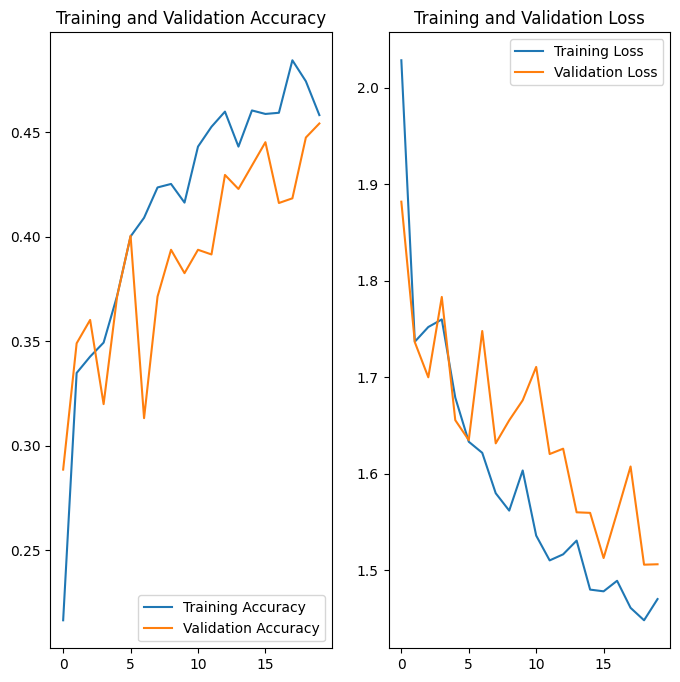

In [ ]:
acc = aug_model_fitted.history['accuracy']
val_acc = aug_model_fitted.history['val_accuracy']

loss = aug_model_fitted.history['loss']
val_loss = aug_model_fitted.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.suptitle('Model with Data Augmentation without Dropout')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 3 : Sequential NN Model with Data Augmentation and Dropout.

In [18]:
aug_model = Sequential(name='CNN-Model-with-Random_Image_Augmentation-and-Dropout')

aug_model.add(layers.Rescaling(1./255, input_shape = (img_height, img_width, 3), name='Rescaling_Layer'))

# Using Data Augmentation Layers eg. RandomCrop, Flip, Translate, Rotate etc.
aug_model.add(layers.RandomCrop(img_height, img_width, name='RandomCrop_Layer'))
aug_model.add(layers.RandomFlip(name='RandomFlip_Layer'))
aug_model.add(layers.RandomTranslation(.8,.7, fill_mode='reflect', name='RandomTranslation_Layer'))
aug_model.add(layers.RandomRotation(0.3, name='RandomRotation_Layer'))
aug_model.add(layers.RandomZoom(0.4, name='RandomZoom_Layer'))

aug_model.add(layers.Conv2D(16, 3, padding='same', activation='relu', name='Conv_1_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_1_Layer'))

aug_model.add(layers.Conv2D(32, 3, padding='same', activation='relu', name='Conv_2_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_2_Layer'))

aug_model.add(layers.Conv2D(64, 3, padding='same', activation='relu', name='Conv_3_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_3_Layer'))

aug_model.add(layers.Flatten(name='Flatten_Layer'))
aug_model.add(layers.Dense(units=128, activation='relu', name='Dense-1_Layer'))
aug_model.add(layers.Dropout(0.2, name='Dropout'))
aug_model.add(layers.Dense(units=9, name='Dense-2_Layer'))

aug_model.summary()



Model: "CNN-Model-with-Random_Image_Augmentation-and-Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rescaling_Layer (Rescaling  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 RandomCrop_Layer (RandomCr  (None, 180, 180, 3)       0         
 op)                                                             
                                                                 
 RandomFlip_Layer (RandomFl  (None, 180, 180, 3)       0         
 ip)                                                             
                                                                 
 RandomTranslation_Layer (R  (None, 180, 180, 3)       0         
 andomTranslation)                                               
                                                                 
 RandomRotatio

In [19]:
epochs = 20
opt = keras.optimizers.Adam(learning_rate=0.001)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

aug_model.compile(optimizer = opt, loss = loss_fn, metrics = ['accuracy'])

aug_model_fitted =  aug_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 23s 86ms/step - loss: 2.1102 - accuracy: 0.2003 - val_loss: 2.0448 - val_accuracy: 0.2483
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.9940 - accuracy: 0.2483 - val_loss: 1.8287 - val_accuracy: 0.3423
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.7718 - accuracy: 0.3465 - val_loss: 1.7074 - val_accuracy: 0.3579
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7174 - accuracy: 0.3538 - val_loss: 1.7409 - val_accuracy: 0.3490
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.7046 - accuracy: 0.3477 - val_loss: 1.7294 - val_accuracy: 0.3244
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6685 - accuracy: 0.3521 - val_loss: 1.6631 - val_accuracy: 0.3826
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6275 - accuracy: 0.3895 - val_loss: 1.6101 - val_accuracy: 0.3870
Epoch 8/20
5

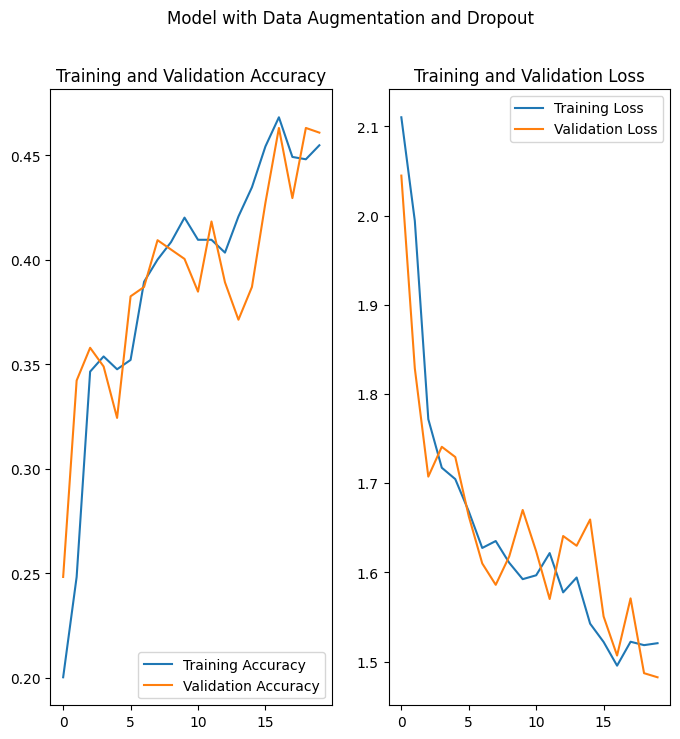

In [21]:
acc = aug_model_fitted.history['accuracy']
val_acc = aug_model_fitted.history['val_accuracy']

loss = aug_model_fitted.history['loss']
val_loss = aug_model_fitted.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.suptitle('Model with Data Augmentation and Dropout')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model 4 : Sequential NN Model having higher Neurons in each layer with implementation of Data Augmentation and Dropout.

In [22]:
aug_model = Sequential(name='CNN-Model-with-Random_Image_Augmentation-Higher_neurons')

aug_model.add(layers.Rescaling(1./255, input_shape = (img_height, img_width, 3), name='Rescaling_Layer'))

aug_model.add(layers.RandomCrop(img_height, img_width, name='RandomCrop_Layer'))
aug_model.add(layers.RandomFlip(name='RandomFlip_Layer'))
aug_model.add(layers.RandomTranslation(.8,.7, fill_mode='reflect', name='RandomTranslation_Layer'))
aug_model.add(layers.RandomRotation(0.3, name='RandomRotation_Layer'))
aug_model.add(layers.RandomZoom(0.4, name='RandomZoom_Layer'))

aug_model.add(layers.Conv2D(64, 3, padding='same', activation='relu', name='Conv_1_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_1_Layer'))

aug_model.add(layers.Conv2D(128, 3, padding='same', activation='relu', name='Conv_2_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_2_Layer'))

aug_model.add(layers.Conv2D(256, 3, padding='same', activation='relu', name='Conv_3_Layer'))
aug_model.add(layers.MaxPooling2D(name='MaxPooling_3_Layer'))

aug_model.add(layers.Flatten(name='Flatten_Layer'))
aug_model.add(layers.Dense(512, activation='relu', name='Dense-1_Layer'))
aug_model.add(layers.Dropout(0.2))
aug_model.add(layers.Dense(9, activation='softmax', name='Dense-2_Layer'))

aug_model.summary()


Model: "CNN-Model-with-Random_Image_Augmentation-Higher_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rescaling_Layer (Rescaling  (None, 180, 180, 3)       0         
 )                                                               
                                                                 
 RandomCrop_Layer (RandomCr  (None, 180, 180, 3)       0         
 op)                                                             
                                                                 
 RandomFlip_Layer (RandomFl  (None, 180, 180, 3)       0         
 ip)                                                             
                                                                 
 RandomTranslation_Layer (R  (None, 180, 180, 3)       0         
 andomTranslation)                                               
                                                                 
 RandomRota

In [23]:
opt = keras.optimizers.Adam(learning_rate=0.001)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

aug_model.compile(optimizer = opt, loss = loss_fn, metrics = ['accuracy'])

aug_model_fitted =  aug_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 14s 125ms/step - loss: 2.2390 - accuracy: 0.2383 - val_loss: 1.9120 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 6s 102ms/step - loss: 1.7687 - accuracy: 0.3387 - val_loss: 1.6938 - val_accuracy: 0.3177
Epoch 3/20
56/56 [==============================] - 5s 95ms/step - loss: 1.7264 - accuracy: 0.3454 - val_loss: 1.6633 - val_accuracy: 0.3803
Epoch 4/20
56/56 [==============================] - 5s 92ms/step - loss: 1.6731 - accuracy: 0.3739 - val_loss: 1.6723 - val_accuracy: 0.3311
Epoch 5/20
56/56 [==============================] - 5s 92ms/step - loss: 1.6601 - accuracy: 0.3599 - val_loss: 1.6335 - val_accuracy: 0.3445
Epoch 6/20
56/56 [==============================] - 5s 91ms/step - loss: 1.6285 - accuracy: 0.3856 - val_loss: 1.6658 - val_accuracy: 0.3266
Epoch 7/20
56/56 [==============================] - 5s 92ms/step - loss: 1.6218 - accuracy: 0.3990 - val_loss: 1.5984 - val_accuracy: 0.4072
Epoch 8/20

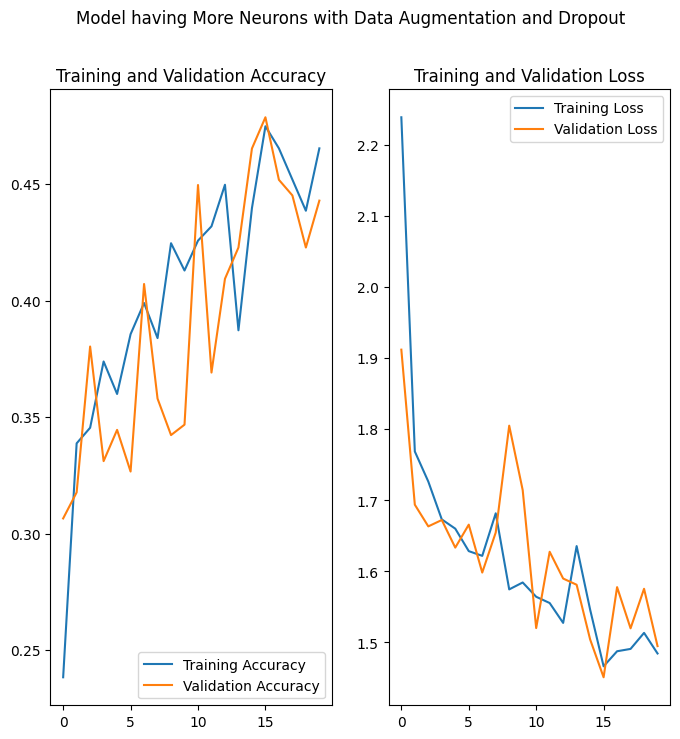

In [24]:
acc = aug_model_fitted.history['accuracy']
val_acc = aug_model_fitted.history['val_accuracy']

loss = aug_model_fitted.history['loss']
val_loss = aug_model_fitted.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.suptitle('Model having More Neurons with Data Augmentation and Dropout')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Findings :**

- **Model-2: Model with Data Augmentation w/o Dropout** :
  - The gap b/w training accuracy and validation accuracy has been reduced, signifying the model is resisting overfitting after Data Augmentation.

  - The training loss and validation loss both shows a steady decline, reaching a low value by the end of 20 epochs.

- **Model-3: Model with Data Augmentation with Dropout** :
  - The gap b/w training accuracy and validation accuracy has been further reduced as compared to the model without Dropout Layer, signifying the model fitting is further improved by using Dropout Layer.

  - The training loss and validation loss both shows a steady decline and fluctuations in Validation Loss reduces further reaching a low value below 1.5 by the end of 20 epochs.

- **Model-4: Model having higher Neurons with Data Augmentation with Dropout** :
  - The fluctuations in Training accuracy and Validation accuracy has been increased.
  - The fluctuations in Training Loss and Validation Loss has been increased.
  - It signifies the model becomes more sensitive to training data and tries to learn more intricate and complex patterns in the data.
  - Each Epoch is causing significant updates in the weights due to large number of neurons.

- **Conclusion :** *By using Data Augmentation Strategy, the MODEL seems to UNDERFIT with lesser accuracy and higher losses.*





## Checking the distribution of classes in the training dataset.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(rescale=1./255)

train_gen = img_generator.flow_from_directory(data_dir_train, target_size=(img_height, img_width), batch_size=batch_size)

class_dist_train = train_gen.classes
class_dist_train_count = np.bincount(class_dist_train)

class_count_dict = {}

for class_index, count in enumerate(class_dist_train_count):
  class_name = class_names[class_index]
  class_count_dict[class_name] = count

print('Class Distribution is as follows: \n')
class_count_dict


Found 2239 images belonging to 9 classes.
Class Distribution is as follows: 



{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

- Which class has the least number of samples?

`Ans: seborrheic keratosis`
- Which classes dominate the data in terms proportionate number of samples?

`Ans: pigmented benign keratosis`


# Rectifying the class imbalance

#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install -q Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset = data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset,i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF91DBC3340>: 100%|██████████| 500/500 [00:17<00:00, 28.24 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AF89DA13A90>: 100%|██████████| 500/500 [00:20<00:00, 24.37 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF89DA23D30>: 100%|██████████| 500/500 [00:17<00:00, 27.84 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF89DECE230>: 100%|██████████| 500/500 [01:35<00:00,  5.25 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7AF91DBC3670>: 100%|██████████| 500/500 [01:21<00:00,  6.10 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AF89DA20130>: 100%|██████████| 500/500 [00:17<00:00, 28.87 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF91DBC2140>: 100%|██████████| 500/500 [00:38<00:00, 12.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AF89DA137F0>: 100%|██████████| 500/500 [00:15<00:00, 32.13 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/DS_Skin-Cancer_CNN/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF89DA222F0>: 100%|██████████| 500/500 [00:16<00:00, 29.62 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


***Lets see the distribution of augmented data after adding new images to the original training data.***

In [28]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list)

4500

In [29]:
os.path.basename(os.path.dirname(os.path.dirname(path_list[100])))

'basal cell carcinoma'

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))


In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [33]:
df2['Label'].value_counts()

Label
basal cell carcinoma          500
nevus                         500
melanoma                      500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
pigmented benign keratosis    500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Training the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

### Creating a training dataset

In [35]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Creating a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Model 5 : Sequential NN Model after Class Rebalancing implemented with Dropout.

In [39]:
from tensorflow.keras.layers import Rescaling

num_class = 9

model_final = Sequential(name='Sequential_Model_after_Class_Rebalancing')

model_final.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3), name='Rescaling_Layer'))

# Or we can specify using below commands separately
#model_final.add(layers.Input(shape=(img_height,img_width,3)))
#model_final.add(layers.Rescaling(scale=1./255))

model_final.add(layers.Conv2D(filters= 16, kernel_size=3, padding='same', activation='relu', name='Conv2D_1_Layer'))
model_final.add(layers.MaxPooling2D(name='MaxPooling_1_Layer'))

model_final.add(layers.Conv2D(filters= 32, kernel_size=3, padding='same', activation='relu', name='Conv2D_2_Layer'))
model_final.add(layers.MaxPooling2D(name='MaxPooling_2_Layer'))

model_final.add(layers.Conv2D(filters= 64, kernel_size=3, padding='same', activation='relu', name='Conv2D_3_Layer'))
model_final.add(layers.MaxPooling2D(name='MaxPooling_3_Layer'))

model_final.add(layers.Flatten(name='Flatten_Layer'))
model_final.add(layers.Dense(units=128, activation='relu', name='Dense-1_Layer'))
model_final.add(layers.Dropout(0.2, name = 'Dropout'))
model_final.add(layers.Dense(units=9, name='Dense-2_Layer'))

### Compile the Final model

In [40]:
opt = keras.optimizers.Adam(learning_rate=0.001)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_final.compile(optimizer = opt,
              loss = loss_fn,
              metrics = ['accuracy'])

### Training the model

In [41]:
epochs = 50
## Your code goes here, use 50 epochs.
model_final_fitted = model_final.fit(train_ds, validation_data = val_ds, epochs= epochs)

Epoch 1/50
169/169 [==============================] - 34s 179ms/step - loss: 1.9121 - accuracy: 0.2685 - val_loss: 1.5475 - val_accuracy: 0.4143
Epoch 2/50
169/169 [==============================] - 28s 162ms/step - loss: 1.4685 - accuracy: 0.4523 - val_loss: 1.3293 - val_accuracy: 0.5256
Epoch 3/50
169/169 [==============================] - 31s 176ms/step - loss: 1.2672 - accuracy: 0.5256 - val_loss: 1.2390 - val_accuracy: 0.5382
Epoch 4/50
169/169 [==============================] - 28s 162ms/step - loss: 1.1529 - accuracy: 0.5729 - val_loss: 1.1563 - val_accuracy: 0.5791
Epoch 5/50
169/169 [==============================] - 28s 160ms/step - loss: 1.0096 - accuracy: 0.6220 - val_loss: 0.9998 - val_accuracy: 0.6392
Epoch 6/50
169/169 [==============================] - 33s 190ms/step - loss: 0.9010 - accuracy: 0.6753 - val_loss: 0.9068 - val_accuracy: 0.6845
Epoch 7/50
169/169 [==============================] - 30s 176ms/step - loss: 0.7067 - accuracy: 0.7389 - val_loss: 0.8696 - val_ac

### Visualizing the model results

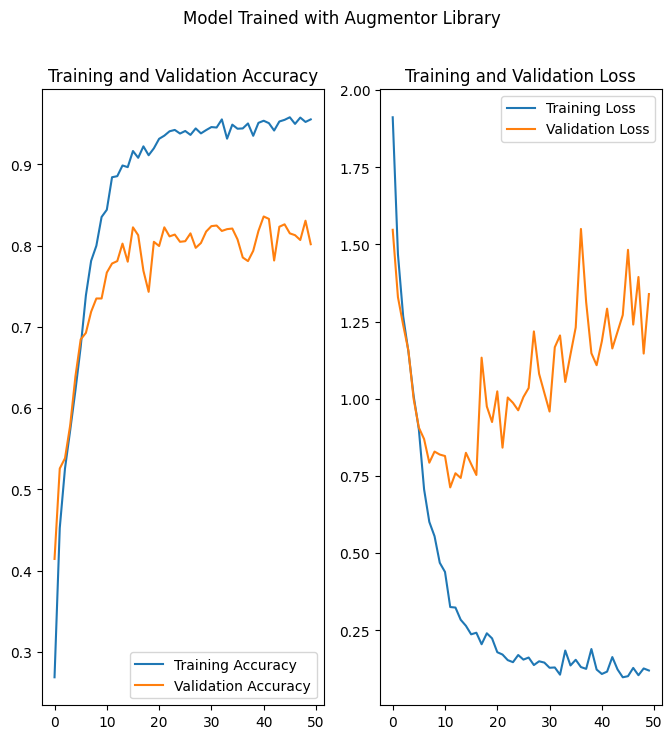

In [43]:
acc = model_final_fitted.history['accuracy']
val_acc = model_final_fitted.history['val_accuracy']

loss = model_final_fitted.history['loss']
val_loss = model_final_fitted.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.suptitle('Model Trained with Augmentor Library')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## **Findings :**
- The model shows improved Validation Accuracy of nearly 0.8 as compared to the previous model without Class Rebalancing

- There is still some gap between Training and Validation Accuracy.

- Training Loss reduces below 0.25. However, Validation loss shows downward trend initially but increases gradually after 20 epochs, signifying MODEL OVERFITTING.

- However, as compared to the previous Models, this model performed better than Models-1/2/3/4.